<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_13_Matplotlib Format Charts.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Subplots with Bar Charts (2.13.1)

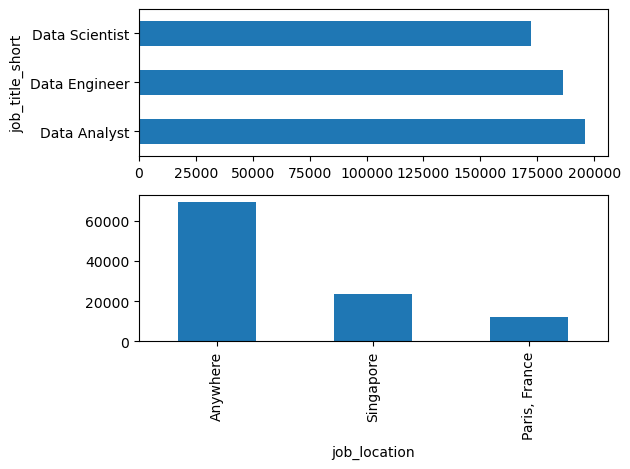

In [5]:
fig, ax = plt.subplots(2, 1)
df['job_location'].value_counts().head(3).plot(kind='bar', ax=ax[1])
df['job_title_short'].value_counts().head(3).plot(kind='barh', ax=ax[0])
fig.tight_layout()

---

## 🟨 Subplots with Job Titles by Schedule (2.13.2)

In [56]:
df_full_time = df[df['job_schedule_type'] == 'Full-time'].groupby('job_title_short').size().reset_index().copy()
df_full_time.columns = ['job_title_short', 'count']
df_full_time = df_full_time.sort_values('count', ascending=False).head(3)
df_full_time

,job_title_short,count
2,Data Analyst,168975
3,Data Engineer,165225
4,Data Scientist,153278


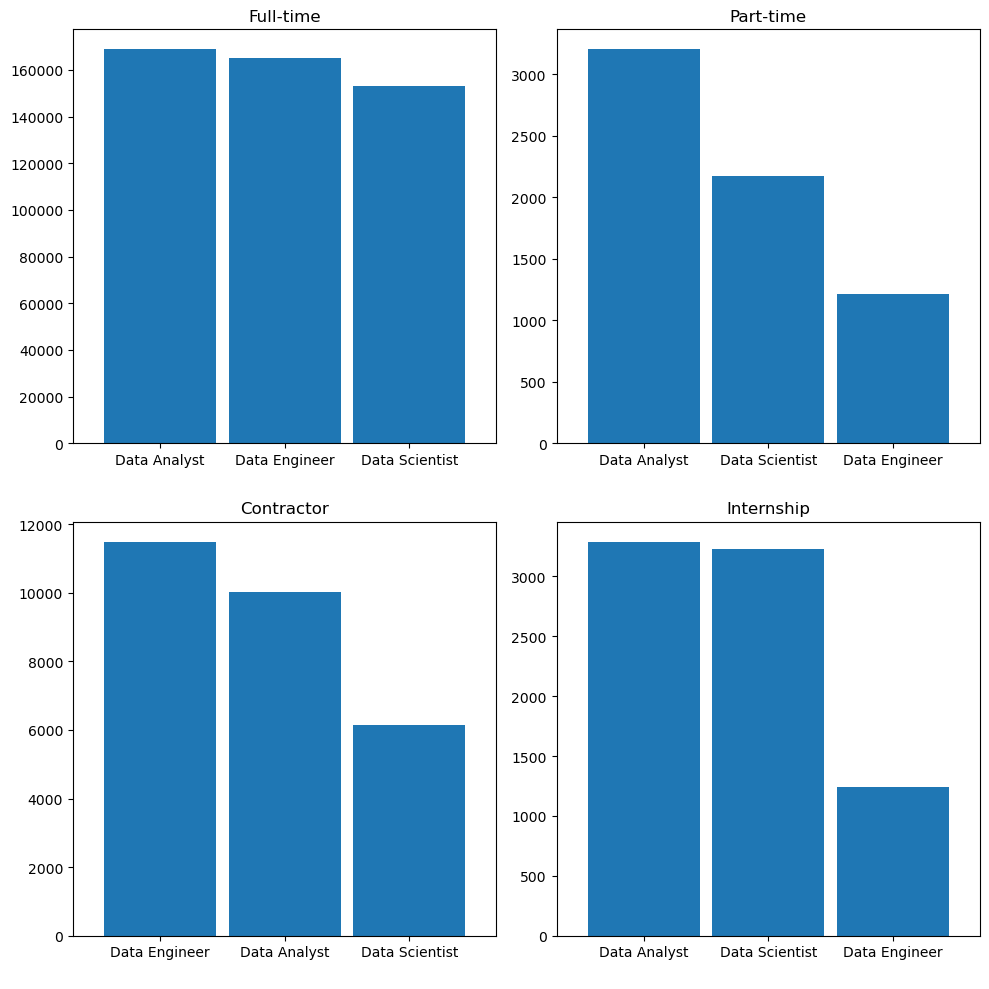

In [95]:
# Code Needed
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for index, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule].groupby('job_title_short').size().reset_index().copy() # Grouping by job title
    df_schedule.columns = ['job_title_short', 'count'] # Renaming columns
    df_schedule = df_schedule.sort_values('count', ascending=False).head(3) # Sorting by count and getting top 3
    df_schedule.plot(kind='bar', x='job_title_short', ax=ax[index//2][index%2], title=schedule, rot=0, width=0.9) # Plotting
    ax[index//2][index%2].set_xlabel(' ')
    ax[index//2][index%2].legend().set_visible(False)
    

fig.tight_layout()
plt.show()

---

## 🟥 Top Skills for Job Roles Subplots (2.13.3)

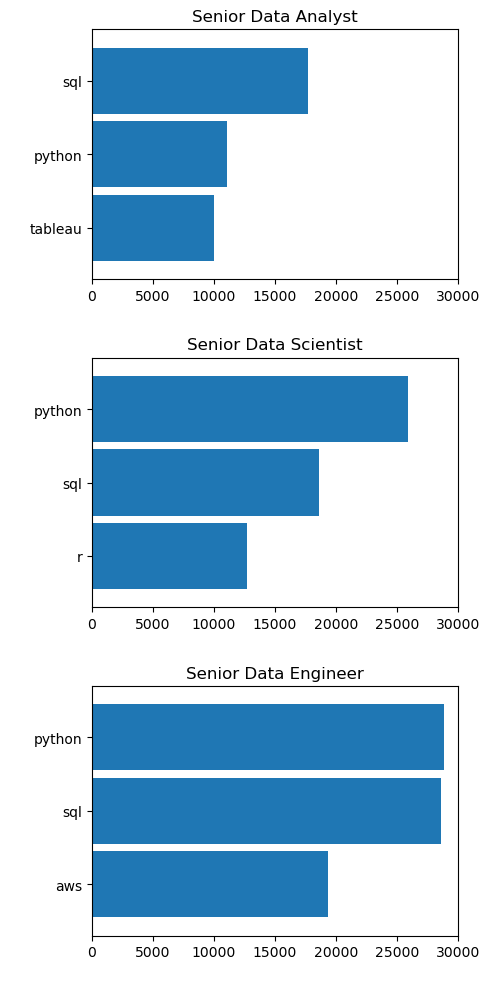

In [99]:
# Code Needed

job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
fig, ax = plt.subplots(3, 1, figsize=(5, 10))

df_skills = df.explode('job_skills')

for index, role in enumerate(job_roles):
    df_job_roles = df_skills[df_skills['job_title_short'] == role]['job_skills'].value_counts().head(3)
    df_job_roles.plot(kind='barh', x='job_skills', y='counts', ax=ax[index], title=role, rot=0, width=0.9) # Plotting
    ax[index].set_xlabel(' ')
    ax[index].set_ylabel(' ')
    ax[index].legend().set_visible(False)
    ax[index].invert_yaxis()
    ax[index].set_xlim(0, 30000)

fig.tight_layout()
plt.show()

---